## Capturing Evolution of Entangled Pair of Qubits on IBM Hardware

### Imports and Saving Default Account

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import api_key
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import DensityMatrix, concurrence
from qiskit.visualization import (
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
    plot_state_city
)

In [2]:
## Save an IBM Quantum account as your default account, and Load saved credentials

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    instance="usc/phys550/phys550",
    token=api_key,
    set_as_default=True,
    overwrite=True,
)
service = QiskitRuntimeService()

### Quantum Circuit for Generating an Entangled Pair - Bell States (11) and (01)
* (01) = $(\ket{01} + \ket{10})/\sqrt(2)$
* (11) = $(\ket{10} - \ket{01})/\sqrt(2)$


In [3]:
## Create quantum circuit for generating Bell state (01)

qc01 = QuantumCircuit(2)
qc01.x(1)  # Apply X gate to the second qubit
qc01.h(0)  # Apply Hadamard gate to the first qubit
qc01.cx(0, 1)  # Apply CNOT gate with the first qubit as control and the second as target
qc01.barrier()

## Quantum circuit for generating Bell state (11)

qc11 = QuantumCircuit(2)
qc11.x([0, 1])  # Apply X gate to the second qubit
qc11.h(0)  # Apply Hadamard gate to the first qubit
qc11.cx(0, 1)  # Apply CNOT gate with the first qubit as control and the second as target
qc11.barrier()

## Analyse the density matrix

density_matrix_01 = DensityMatrix.from_instruction(qc01)
density_matrix_11 = DensityMatrix.from_instruction(qc11)

Quantum circuit for preparing Bell States (01) and (11):


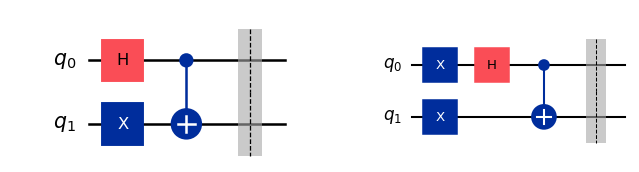

In [4]:
## Print quantum circuits

print("Quantum circuit for preparing Bell States (01) and (11):")
fig1, axs = plt.subplots(1, 2, figsize=(8, 4))
qc01.draw(output='mpl', ax=axs[0])
qc11.draw(output='mpl', ax=axs[1])
plt.show()

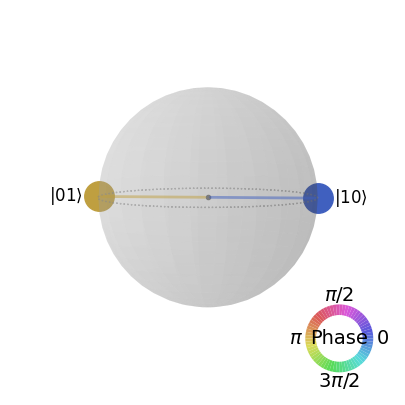

In [5]:
## Print qSpheres for Bell state (01) or (11)

# plot_state_qsphere(state=density_matrix_01, figsize=(5, 5))
plot_state_qsphere(state=density_matrix_11, figsize=(5, 5))

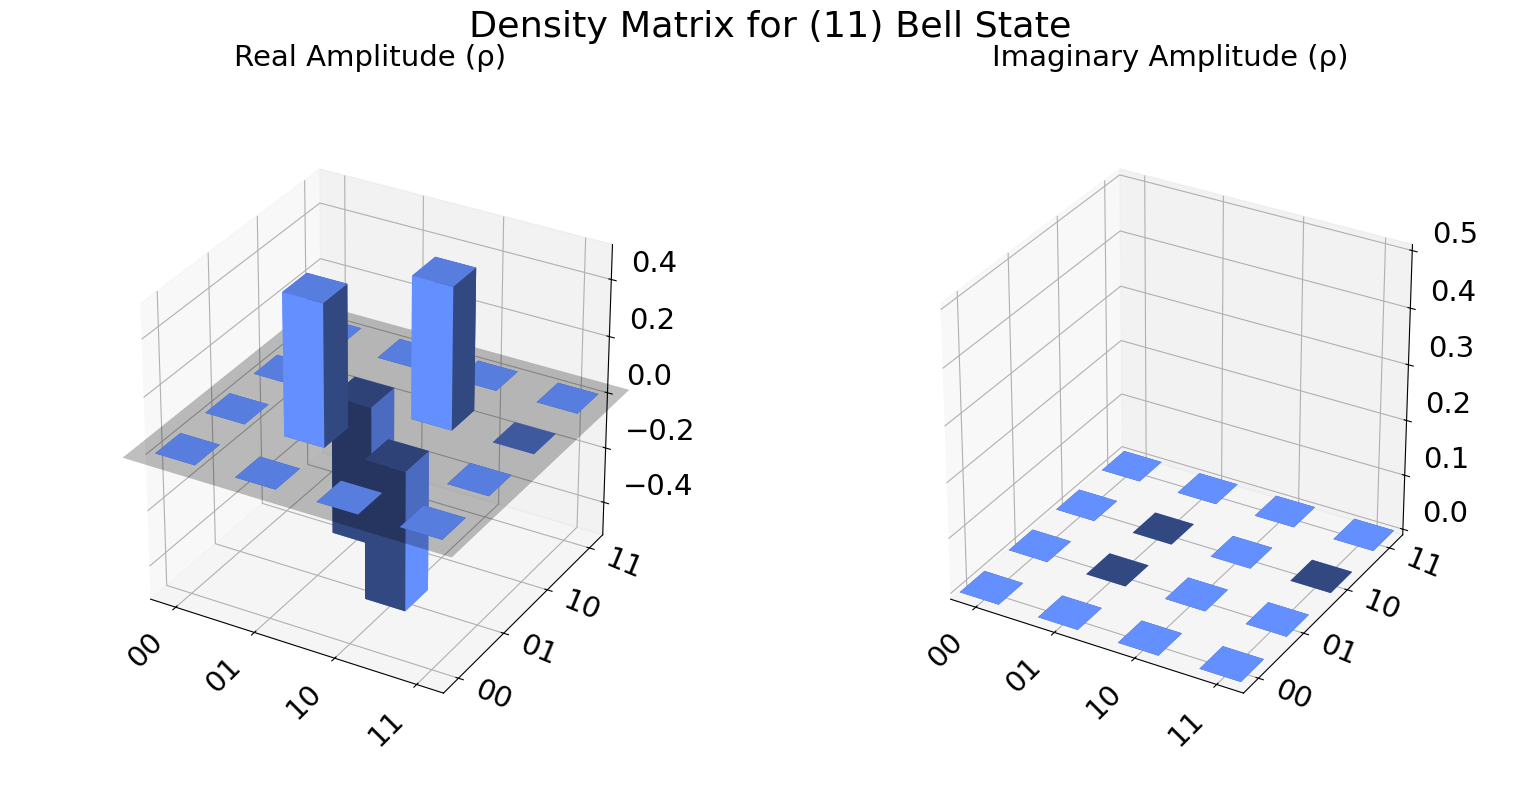

In [6]:
## Visualize Density Matrices for Bell state (01) or (11)

# plot_state_city(density_matrix_01, title='Density Matrix for (01) Bell State')
plot_state_city(density_matrix_11, title='Density Matrix for (11) Bell State')

### Generating $(n-1)$ Quantum Circuits for Measuring Entangled State over Time $t$
Essentially, $n = (t - 0)/\Delta{t}$. <br/>
Here, we consider and arbitary n.

In [7]:
from utils import list_of_circuits

n = 10
circ_list = list_of_circuits(qc11, n)

# Print out the circuits
for i in range(n):
    print(f"Circuit {i}:")
    print(circ_list[i].draw())

Circuit 0:
     ┌───┐┌───┐      ░ 
q_0: ┤ X ├┤ H ├──■───░─
     ├───┤└───┘┌─┴─┐ ░ 
q_1: ┤ X ├─────┤ X ├─░─
     └───┘     └───┘ ░ 
Circuit 1:
     ┌───┐┌───┐      ░ ┌───┐┌───┐ ░ ┌───┐┌───┐ ░ ┌───┐┌───┐ ░ 
q_0: ┤ X ├┤ H ├──■───░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─
     ├───┤└───┘┌─┴─┐ ░ ├───┤├───┤ ░ ├───┤├───┤ ░ ├───┤├───┤ ░ 
q_1: ┤ X ├─────┤ X ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─
     └───┘     └───┘ ░ └───┘└───┘ ░ └───┘└───┘ ░ └───┘└───┘ ░ 
Circuit 2:
     ┌───┐┌───┐      ░ ┌───┐┌───┐ ░ ┌───┐┌───┐ ░ ┌───┐┌───┐ ░ ┌───┐┌───┐ ░ »
q_0: ┤ X ├┤ H ├──■───░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─»
     ├───┤└───┘┌─┴─┐ ░ ├───┤├───┤ ░ ├───┤├───┤ ░ ├───┤├───┤ ░ ├───┤├───┤ ░ »
q_1: ┤ X ├─────┤ X ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─»
     └───┘     └───┘ ░ └───┘└───┘ ░ └───┘└───┘ ░ └───┘└───┘ ░ └───┘└───┘ ░ »
«     ┌───┐┌───┐ ░ ┌───┐┌───┐ ░ 
«q_0: ┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─
«     ├───┤├───┤ ░ ├───┤├───┤ ░ 
«q_1: ┤ H ├┤ H ├─░─┤ H ├┤ H ├─░─
«     └───┘└───

### Running Jobs on IBM
Measuring $n$ Circuits to get the Output Density Matrices using State Tomography

In [8]:
service.backends()

[<IBMBackend('ibm_torino')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_sherbrooke')>]

#### Jobs run with simple ZZ measurement

In [ ]:
# from utils import execute_job

# ## Code for measuring n circuits in the 'circ_list'

# shots = 10
# jobs = [None for x in range(n)]
# backend = service.backend("ibmq_qasm_simulator")
# # backend = service.backend("ibm_kyoto")
# session = Session(service=service, backend=backend)

# with Session(service=service, backend=backend):
#     for i in range(n):
#         jobs[i] = execute_job(circ_list[i], backend, shots)

#### Jobs performed for State Tomography

In [9]:
from qiskit_experiments.library import StateTomography
from qiskit_experiments.framework import ParallelExperiment
from qiskit.visualization import plot_state_city
from qiskit.compiler import transpile
from qiskit.providers.fake_provider import FakeQasmBackend, GenericBackendV2

# backend = GenericBackendV2(num_qubits=5)
# backend = service.backend("ibmq_qasm_simulator")
backend = service.backend("ibm_torino")

data_list = []
jobs = [None for x in range(n)]
state_results = [None for x in range(n)]

for i in range(n):
    qstexp = StateTomography(circ_list[i])
    qstdata = qstexp.run(backend, seed_simulation=100).block_for_results() # In StateTomography, each circuit runs 9 times
    state_result = None
    if qstdata != None:
        state_result = qstdata.analysis_results("state").value
        print(str(i)+" " + str(qstdata.experiment_id) + " : " + str(qstdata.status))
    data_list.append(
            {
                "circuit": circ_list[i],
                "tomo_result": qstdata,
                "density_matrix": state_result
            }
        )
    
data = pd.DataFrame(data_list)

c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


0 e82a1921-ef85-4e77-8aae-ae36b5d86080 : <bound method ExperimentData.status of ExperimentData(StateTomography, e82a1921-ef85-4e77-8aae-ae36b5d86080, job_ids=['crv7cx37wv80008fdpx0'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


1 4b266887-2db9-47e2-b61b-e0ff2d1c9739 : <bound method ExperimentData.status of ExperimentData(StateTomography, 4b266887-2db9-47e2-b61b-e0ff2d1c9739, job_ids=['crv9c1ry7jt000806sd0'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


2 e0aedd7a-b345-4562-a88a-d369169e8c1d : <bound method ExperimentData.status of ExperimentData(StateTomography, e0aedd7a-b345-4562-a88a-d369169e8c1d, job_ids=['crv9s6mdbt40008jtsz0'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


3 a555bd25-6dc9-4893-81d9-132f0c12b95f : <bound method ExperimentData.status of ExperimentData(StateTomography, a555bd25-6dc9-4893-81d9-132f0c12b95f, job_ids=['crva7hpx484g008f9m60'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


4 9bd88731-0dac-4147-8aef-49b11905d6c7 : <bound method ExperimentData.status of ExperimentData(StateTomography, 9bd88731-0dac-4147-8aef-49b11905d6c7, job_ids=['crvape1dbt40008jtww0'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


5 a6f8586c-0a26-4131-b077-514601ee999a : <bound method ExperimentData.status of ExperimentData(StateTomography, a6f8586c-0a26-4131-b077-514601ee999a, job_ids=['crvb4pjgd8qg008rppk0'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


6 afab8a09-deaf-4809-9bd3-e32b3f8a99cf : <bound method ExperimentData.status of ExperimentData(StateTomography, afab8a09-deaf-4809-9bd3-e32b3f8a99cf, job_ids=['crvb60gx484g008f9pvg'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


7 54a068be-b88c-48b0-846e-1a8ceefde849 : <bound method ExperimentData.status of ExperimentData(StateTomography, 54a068be-b88c-48b0-846e-1a8ceefde849, job_ids=['crvb75mdbt40008jtyf0'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


8 33a63213-8951-4ac0-86ad-450ba7922afb : <bound method ExperimentData.status of ExperimentData(StateTomography, 33a63213-8951-4ac0-86ad-450ba7922afb, job_ids=['crvb8zkdbt40008jtyng'], metadata=<4 items>)>


c:\Users\Pranavi\phys550\venv\Lib\site-packages\qiskit_experiments\framework\base_experiment.py:254: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = experiment._run_jobs(transpiled_circuits, **run_opts)


9 2db1a4f4-1726-4cbf-a647-77af6737e738 : <bound method ExperimentData.status of ExperimentData(StateTomography, 2db1a4f4-1726-4cbf-a647-77af6737e738, job_ids=['crvbb0m7jqmg008zkw20'], metadata=<4 items>)>


In [10]:
print(data)

                                             circuit  \
0  ((Instruction(name='x', num_qubits=1, num_clbi...   
1  ((Instruction(name='x', num_qubits=1, num_clbi...   
2  ((Instruction(name='x', num_qubits=1, num_clbi...   
3  ((Instruction(name='x', num_qubits=1, num_clbi...   
4  ((Instruction(name='x', num_qubits=1, num_clbi...   
5  ((Instruction(name='x', num_qubits=1, num_clbi...   
6  ((Instruction(name='x', num_qubits=1, num_clbi...   
7  ((Instruction(name='x', num_qubits=1, num_clbi...   
8  ((Instruction(name='x', num_qubits=1, num_clbi...   
9  ((Instruction(name='x', num_qubits=1, num_clbi...   

                                         tomo_result  \
0  ----------------------------------------------...   
1  ----------------------------------------------...   
2  ----------------------------------------------...   
3  ----------------------------------------------...   
4  ----------------------------------------------...   
5  --------------------------------------------

### Calculate Concurrence and Plot

[0.9999999999999994, 0.6802093523826176, 0.6850437062668197, 0.6707433426077049, 0.6984040460378396, 0.6623112064563719, 0.6470150049666206, 0.6346461794987419, 0.6394879554664223, 0.6450752570544797, 0.5965711225782175]
[0.9999999999999994, 0.6802093523826176, 0.6850437062668197, 0.6707433426077049, 0.6984040460378396, 0.6623112064563719, 0.6470150049666206, 0.6346461794987419, 0.6394879554664223, 0.6450752570544797, 0.5965711225782175]


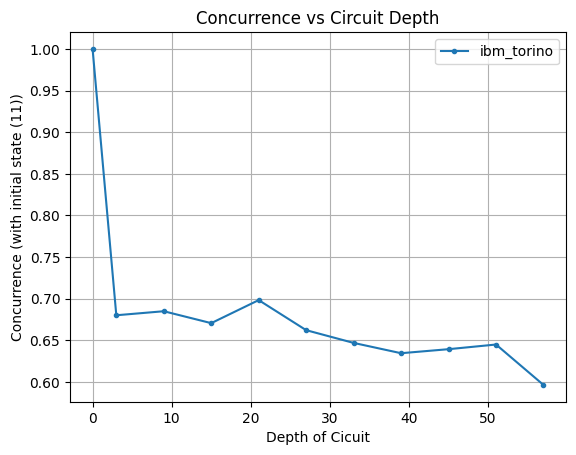

In [12]:
conc_list = []
depths = []

## Concurrence of intial Bell state

conc_list.append(concurrence(density_matrix_11))
for dm in data["density_matrix"]:
    conc_list.append(concurrence(dm))
print(conc_list)

## Storing circuit depth

depths.append(0) # Initializing
for circuit in data["circuit"]:
    depths.append(circuit.depth())
print(conc_list)

## Plotting Concurrence vs Circuit Depth

plt.title("Concurrence vs Circuit Depth")
plt.xlabel("Depth of Cicuit")
plt.ylabel("Concurrence - with initial state (11)")
plt.plot(depths, conc_list, marker='.', label='ibm_torino')
plt.grid(True)
plt.legend()
plt.show()

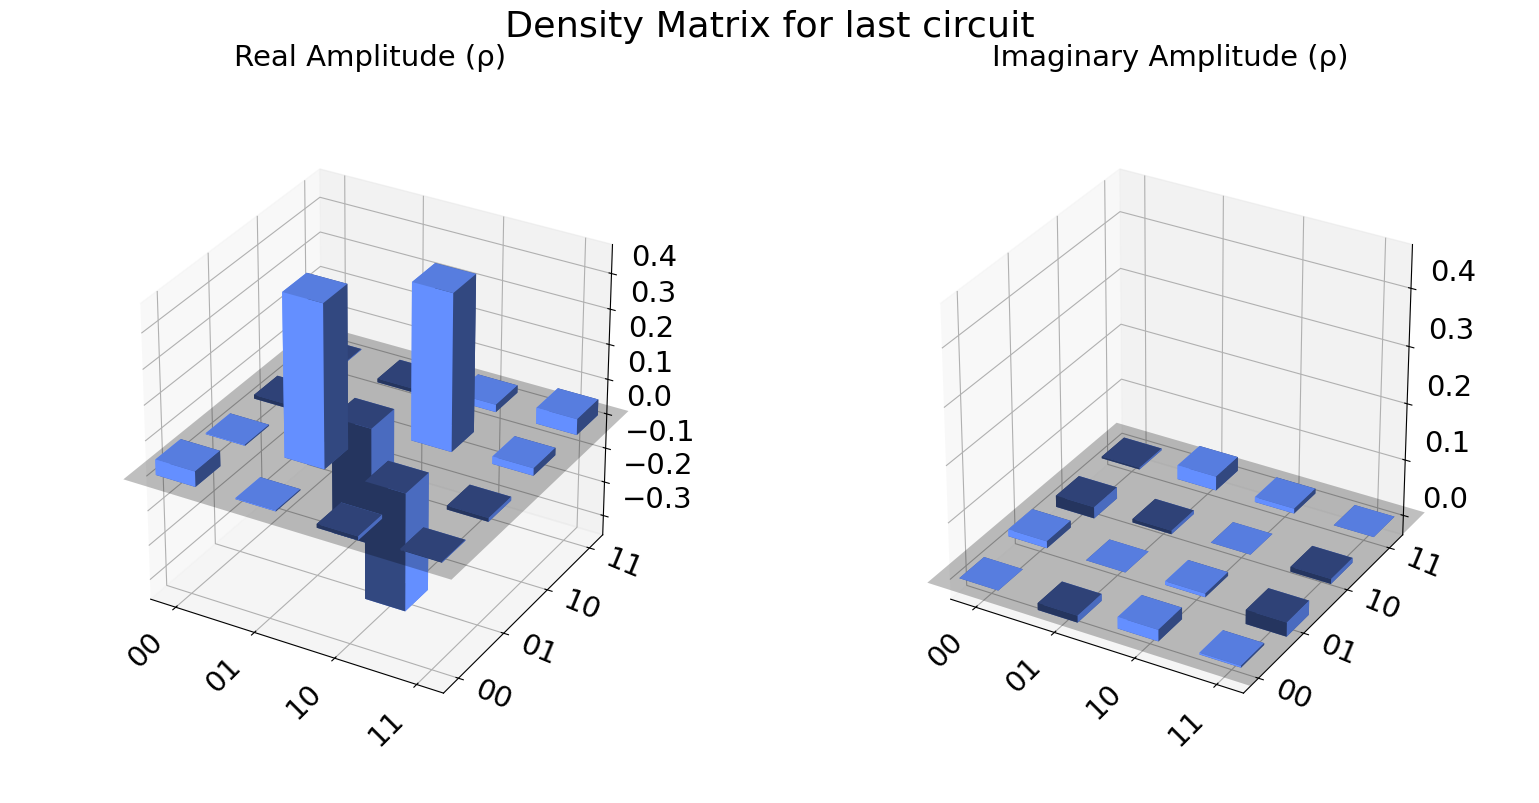

In [13]:
# Plotting the density matrix from last circuit

plot_state_city(dm, title='Density Matrix for last circuit')

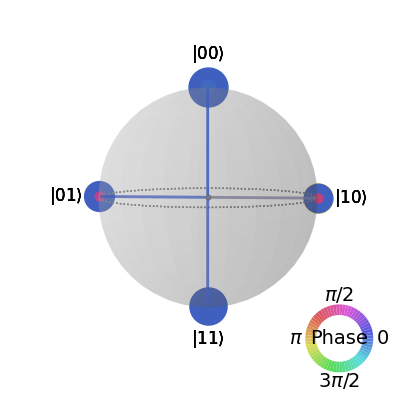

In [14]:
# Plotting the qSphere from last circuit

plot_state_qsphere(state=dm, figsize=(5, 5))

In [ ]:
# ## Check job status

# for i in range(n):
#     job = jobs[i][0]
#     print(str(job.job_id()) + ": status - "+str(job.status()))